<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Preface

I am using the same data as in the previous assignment and the beginning will mostly just be copied from there.

# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I chose to use a dataset with data about the federal SNAP program. The dataset records the amount spent on the program, the amount recieved by each participant and the amount of participants, for each fiscal year from 1969 to 2015. The data was sourced from [here](https://data.world/agriculture/snap-participationcost-data). I will also include population data found [here] https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html

This data is very interesting to me. My wife is a Registered Dietitian and I have come to realize how important the SNAP program is, not just as a survival and basic necessity program, but also as a preventative program. Having access to more funding for food allows people to make healthier decisions and prevent chronic diseases. I am curious about the growth of the SNAP program and about its management of funds, what percentage of its budget actually goes into participants pockets versus other administrative costs.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [26]:
import pandas as pd

snap = pd.read_excel('https://query.data.world/s/u7hzygp4lb3junfphtnkxrce2okc4f?dws=00000')
display(snap.head(10))
print(snap.dtypes)

,Supplemental Nutrition Assistance Program Participation and Costs,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"(Data as of July 8, 2016)",NaN,NaN,NaN,NaN,NaN
1,,,Average Benefit Per Person 1],,All Other Costs 2],
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Fiscal Year,Average Participation,NaN,Total Benefits,NaN,Total Costs
4,,--Thousands--,--Dollars--,----------Millions of Dollars----------,NaN,NaN
5,1969,2878,6.63,228.8,21.7,250.5
6,1970,4340,10.55,549.7,27.2,576.9
7,1971,9368,13.55,1522.7,53.2,1575.9
8,1972,11109,13.48,1797.3,69.4,1866.7
9,1973,12166,14.6,2131.4,76,2207.4


Supplemental Nutrition Assistance Program Participation and Costs    object
Unnamed: 1                                                           object
Unnamed: 2                                                           object
Unnamed: 3                                                           object
Unnamed: 4                                                           object
Unnamed: 5                                                           object
dtype: object


In [27]:
#summary statistics
snap.describe()

,Supplemental Nutrition Assistance Program Participation and Costs,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
count,55,50,49.00,50,48,49
unique,54,50,48.00,50,48,49
top,,,71.27,,All Other Costs 2],
freq,2,1,2.00,1,1,1


This data needs some work. The summary statistics of the data as is doesn't actually provide much insight. Before finding the summary statistics we have to clean it a bit. First, we will work on getting the column names right and removing the extra first few rows. The actual column names are split between the second and fourth rows. The units the columns are measured in can be found in the fifth row. The last two columns don't say what the unit is but is evident it is the same as the column right before it. We will extract all this information for the new column names. Once we do that we can remove the non-numeric rows and convert the columns to numeric type since all the actual data is numeric.

In [28]:
# create a list of column names extracted from the second and fourth rows of the dataset 

column_names = [] #initialize an empty list

# Loop through the columns of the second and fourth rows of the dataset and append the non-empty column names to the list
for col1, col2 in zip(snap.iloc[1], snap.iloc[3]):
    if col1.strip():  # Check if col1 is not empty after stripping whitespace
        col1 = col1.strip().replace(" 1]", "").replace(" 2]", "")  # Remove ' 1]' ans ' 2]' if present
        column_names.append(col1)
    elif col2.strip():  # Check if col2 is not empty after stripping whitespace
        column_names.append(col2)
    else:
        column_names.append('')

# extract the units from the fifth row
        
fifth_row = snap.iloc[4]  # Extract the fifth sublist
key_value_pairs = {col: value for col, value in zip(column_names, fifth_row)}
col_names_final = []

# Iterate through the dictionary
for column_name, value in key_value_pairs.items():
    # If the value is not empty (not '\xa0...') and not None
    if value and value != '\xa0\xa0\xa0' and not pd.isna(value):
        # Remove '--' (potentially multiple occurrences) from the value
        value = value.replace('--', '').strip()
        # Split the value by space and take the first word
        first_word = value.split()[0]
        # Add parentheses around the word
        first_word_with_parentheses = f"({first_word})"
        # Append the first word to the column name
        col_names_final.append(f"{column_name} {first_word_with_parentheses}")
    elif pd.isna(value):
        # Add (Millions) to the column name for NaN values
        col_names_final.append(f"{column_name} (Millions)")
    else:
        # If no value to append, just use the original column name
        col_names_final.append(column_name)

# print(col_names_final) # print the results to ensure the correct column names are extracted



snap.columns = col_names_final # assign the extracted column names to the dataset
snap_named = snap.drop(range(5)) # remove the now extraneous rows
snap_named = snap_named.reset_index(drop=True) # reset the index
snap_named.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions)
0,1969,2878,6.63,228.8,21.7,250.5
1,1970,4340,10.55,549.7,27.2,576.9
2,1971,9368,13.55,1522.7,53.2,1575.9
3,1972,11109,13.48,1797.3,69.4,1866.7
4,1973,12166,14.6,2131.4,76,2207.4
5,1974,12862,17.61,2718.3,119.2,2837.5
6,1975,17064,21.4,4385.5,233.2,4618.7
7,1976,18549,23.93,5326.5,359,5685.5
8,1977,17077,24.71,5067,394,5461
9,1978,16001,26.77,5139.2,380.5,5519.7


We've successfully extracted the column names and dropped those rows.

In [29]:
snap_cleaned = snap_named.drop(snap_named.index[-7:])
snap_cleaned.tail(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions)
37,2006,26548.833167,94.75,30187.35,2715.72,32903.06
38,2007,26316.044583,96.18,30373.27,2800.25,33173.52
39,2008,28222.63025,102.19,34608.4,3031.25,37639.64
40,2009,33489.9745,125.31,50359.92,3260,53619.92
41,2010,40301.878,133.79,64702.16,3581.3,68283.47
42,2011,44708.726083,133.85,71810.92,3875.56,75686.49
43,2012,46609.0715,133.41,74619.34,3790.34,78409.68
44,2013,47636.089833,133.07,76066.32,3804.52,79870.84
45,2014,46663.616167,125.01,69998.84,4075.18,74074.02
46,2015,45766.671667,126.83,69655.43,4320.92,73976.35


We've successfully dropped the last few rows which didn't contain any new records.

 Now we will wrok on converting the columns to numeric type.

In [30]:
# Function to convert a value to numeric, handling exceptions
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return value

# Apply convert_to_numeric function to each column of snap_cleaned DataFrame
snap_cleaned = snap_cleaned.applymap(convert_to_numeric)

# Check the class of each column after conversion
print(snap_cleaned.dtypes)

Fiscal Year                              object
Average Participation (Thousands)       float64
Average Benefit Per Person (Dollars)    float64
Total Benefits (Millions)               float64
All Other Costs (Millions)              float64
Total Costs (Millions)                  float64
dtype: object


C:\Users\shaya\AppData\Local\Temp\ipykernel_9492\4198577940.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  snap_cleaned = snap_cleaned.applymap(convert_to_numeric)


All but the first column "Fiscal Year' were successfully converted.

In [31]:
# Function to convert a value to numeric, handling exceptions
def find_non_numeric(value):
    try:
        pd.to_numeric(value)
        return False  # Return False if conversion is successful
    except ValueError:
        return True   # Return True if conversion fails

# Filter the DataFrame for non-numeric values in the 'Fiscal Year' column
non_numeric_fiscal_years = snap_cleaned[snap_cleaned['Fiscal Year'].apply(find_non_numeric)]

# Display the non-numeric values causing issues in the 'Fiscal Year' column
print(f"Non-numeric values in the 'Fiscal Year' column:\n{non_numeric_fiscal_years['Fiscal Year']}")


Non-numeric values in the 'Fiscal Year' column:
13    1982 3]
Name: Fiscal Year, dtype: object


We've located the value causing the error. We will drop the extra characters and convert the column.

In [32]:
# Remove the ' 3]' suffix from the non-numeric value in the 'Fiscal Year' column
snap_cleaned.loc[non_numeric_fiscal_years.index, 'Fiscal Year'] = non_numeric_fiscal_years['Fiscal Year'].str.replace(' 3]', '')

# Convert the 'Fiscal Year' column to numeric type
snap_cleaned['Fiscal Year'] = convert_to_numeric(snap_cleaned['Fiscal Year'])

snap_cleaned.dtypes

Fiscal Year                               int64
Average Participation (Thousands)       float64
Average Benefit Per Person (Dollars)    float64
Total Benefits (Millions)               float64
All Other Costs (Millions)              float64
Total Costs (Millions)                  float64
dtype: object

All the columns are now successfully converted.. We can now generate some summary statistics.

In [33]:
#summary statistics
snap_cleaned.describe()

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions)
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1992.000000,23165.154807,64.301489,21951.356809,1656.606596,23607.963191
std,13.711309,10344.826789,37.427010,21475.866799,1248.400973,22631.494960
min,1969.000000,2878.000000,6.630000,228.800000,21.700000,250.500000
25%,1980.500000,17917.768958,36.820000,9464.600000,540.500000,10021.600000
50%,1992.000000,21082.000000,67.950000,15547.390000,1556.660000,17789.390000
75%,2003.500000,26432.438875,85.050000,23691.480000,2446.075000,25859.700000
max,2015.000000,47636.089833,133.850000,76066.320000,4320.920000,79870.840000


The summary statistics provided give valuable insights into the trends and characteristics of the data. The average participation in the SNAP program, represented in thousands, indicates a consistent level of engagement over the years, with an average of approximately 23 million participants. However, there is considerable variation in participation levels, as indicated by the standard deviation of approximately 10,345 thousand. The average benefit per person has a mean of $64.30, with a standard deviation of $37.43, suggesting variability in the benefits received by participants. The total benefits and costs of the program, both in millions, display a wide range of values, with substantial standard deviations. Notably, the minimum values for total benefits and costs highlight the existence of years with relatively low expenditure, while the maximum values underscore periods of heightened program costs.

The wide range of values and significant standard deviations are likely due to the nature of the program changing over time. Both the program itself might have been used differently in fifferent eras and the population growth of the USA could skew the numbers even if the overall ratios are the same. We will try rectifying these issues in the next section.

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

As noted in the previous section, this data needs to have the population data for each year and some way to group the records by era. I took population data from the US census, I will create a new dataframe with this data and merge it with our SNAP dataframe.

In [35]:
# Define the census DataFrame
census = {'year': [1960, 1970, 1980, 1990, 2000, 2010, 2020],
          'Population': [179323926, 203211926, 226545805, 248421906, 281421906, 308745538, 331449281]}
Population = pd.DataFrame(census)

# Merge snap_cleaned with population based on 'Fiscal Year' and 'year' columns
merged_df = pd.merge(snap_cleaned, Population, left_on='Fiscal Year', right_on='year', how='left')

# Drop the extraneous 'year' column
merged_df.drop(columns=['year'], inplace=True)

merged_df.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population
0,1969,2878.0,6.63,228.8,21.7,250.5,NaN
1,1970,4340.0,10.55,549.7,27.2,576.9,203211926.0
2,1971,9368.0,13.55,1522.7,53.2,1575.9,NaN
3,1972,11109.0,13.48,1797.3,69.4,1866.7,NaN
4,1973,12166.0,14.60,2131.4,76.0,2207.4,NaN
5,1974,12862.0,17.61,2718.3,119.2,2837.5,NaN
6,1975,17064.0,21.40,4385.5,233.2,4618.7,NaN
7,1976,18549.0,23.93,5326.5,359.0,5685.5,NaN
8,1977,17077.0,24.71,5067.0,394.0,5461.0,NaN
9,1978,16001.0,26.77,5139.2,380.5,5519.7,NaN


Since we only had data for every ten years, we have many missing values in our new dataset. We can impute the population of the missing years by applying a CAGR (Compound Annual Growth Rate) formula to calculate the expected growth each year to reach the end of decade population target.

In [36]:
# Calculate the CAGR for each decade
Population['CAGR'] = (Population['Population'].shift(-1) / Population['Population']) ** (1/10) - 1

# Merge snap_cleaned with population based on 'Fiscal Year' and 'year' columns
merged_df = pd.merge(snap_cleaned, Population, left_on='Fiscal Year', right_on='year', how='left')

merged_df.drop(columns=['year'], inplace=True)

# Impute population values for missing years based on compound growth
for year in range(merged_df['Fiscal Year'].min(), merged_df['Fiscal Year'].max() + 1):
    if pd.isna(merged_df.loc[merged_df['Fiscal Year'] == year, 'Population'].iloc[0]):
        decade = year // 10 * 10
        prev_year = year - 1
        prev_population_series = merged_df.loc[merged_df['Fiscal Year'] == prev_year, 'Population']
        if not prev_population_series.empty:
            prev_population = prev_population_series.iloc[0]
            if pd.notna(prev_population):
                cagr = merged_df.loc[merged_df['Fiscal Year'] == decade, 'CAGR'].iloc[0]
                estimated_population = prev_population * (1 + cagr)
                merged_df.loc[merged_df['Fiscal Year'] == year, 'Population'] = estimated_population

merged_df.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,CAGR
0,1969,2878.0,6.63,228.8,21.7,250.5,NaN,NaN
1,1970,4340.0,10.55,549.7,27.2,576.9,2.032119e+08,0.010929
2,1971,9368.0,13.55,1522.7,53.2,1575.9,2.054328e+08,NaN
3,1972,11109.0,13.48,1797.3,69.4,1866.7,2.076780e+08,NaN
4,1973,12166.0,14.60,2131.4,76.0,2207.4,2.099478e+08,NaN
5,1974,12862.0,17.61,2718.3,119.2,2837.5,2.122423e+08,NaN
6,1975,17064.0,21.40,4385.5,233.2,4618.7,2.145619e+08,NaN
7,1976,18549.0,23.93,5326.5,359.0,5685.5,2.169069e+08,NaN
8,1977,17077.0,24.71,5067.0,394.0,5461.0,2.192775e+08,NaN
9,1978,16001.0,26.77,5139.2,380.5,5519.7,2.216739e+08,NaN


We successfully imputed the population for most of the years in our dataset. However, for the first year, 1969, we still do not have data. This is due to there not being any data for the year 1960 to calculate the CAGR from. We will just use the CAGR of the following decade to calculate the population for this year.

In [37]:
index_1969 = merged_df.index[merged_df['Fiscal Year'] == 1969][0]

# Find the CAGR for the year 1970
cagr_1970 = merged_df.loc[merged_df['Fiscal Year'] == 1970, 'CAGR'].iloc[0]

# Find the population for the year 1970
population_1970 = merged_df.loc[merged_df['Fiscal Year'] == 1970, 'Population'].iloc[0]

# Calculate the estimated population for the year 1969
estimated_population_1969 = population_1970 / (1 + cagr_1970)

# Cast the estimated population to integer
estimated_population_1969 = int(estimated_population_1969)

# Update the Population value for the row with Fiscal Year = 1969
merged_df.at[index_1969, 'Population'] = estimated_population_1969

merged_df.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,CAGR
0,1969,2878.0,6.63,228.8,21.7,250.5,2.010150e+08,NaN
1,1970,4340.0,10.55,549.7,27.2,576.9,2.032119e+08,0.010929
2,1971,9368.0,13.55,1522.7,53.2,1575.9,2.054328e+08,NaN
3,1972,11109.0,13.48,1797.3,69.4,1866.7,2.076780e+08,NaN
4,1973,12166.0,14.60,2131.4,76.0,2207.4,2.099478e+08,NaN
5,1974,12862.0,17.61,2718.3,119.2,2837.5,2.122423e+08,NaN
6,1975,17064.0,21.40,4385.5,233.2,4618.7,2.145619e+08,NaN
7,1976,18549.0,23.93,5326.5,359.0,5685.5,2.169069e+08,NaN
8,1977,17077.0,24.71,5067.0,394.0,5461.0,2.192775e+08,NaN
9,1978,16001.0,26.77,5139.2,380.5,5519.7,2.216739e+08,NaN


Now that we have imputed the population data we can drop the CAGR column and use the population data to generate some new columns. We will create a column with the ratio of participants in the SNAP program to the general population of the US and a column with the ratio of the total cost of the SNAP program relative to the population to account for amount of taxpayers.

In [38]:
# Drop CAGR
merged_df.drop(columns=['CAGR'], inplace=True)

# Calculate the ratio of participants to population
merged_df['Participants to Population Ratio'] = merged_df['Average Participation (Thousands)'] / merged_df['Population']

# Calculate the ratio of total cost to participants
merged_df['Total Cost to Population Ratio'] = merged_df['Total Costs (Millions)'] / merged_df['Population']

# Display the DataFrame with the new columns
merged_df.head()

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,Participants to Population Ratio,Total Cost to Population Ratio
0,1969,2878.0,6.63,228.8,21.7,250.5,2.010150e+08,0.000014,0.000001
1,1970,4340.0,10.55,549.7,27.2,576.9,2.032119e+08,0.000021,0.000003
2,1971,9368.0,13.55,1522.7,53.2,1575.9,2.054328e+08,0.000046,0.000008
3,1972,11109.0,13.48,1797.3,69.4,1866.7,2.076780e+08,0.000053,0.000009
4,1973,12166.0,14.60,2131.4,76.0,2207.4,2.099478e+08,0.000058,0.000011


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



We can use our cleaned dataset to answer some questions I had.
- What is the relationship between the costs of running the program relative to the amount being distributed and how does that relationship change over time?
- How is the ratio of Americans on SNAP changing over time?
- Is there a relationship between the amount of participants in the program and the total amount each participant receives?

To answer our first question from earlier. The following subplot shows us the trends of both the administrative costs of the program and the total amount of benefits being distributed. Comparing those two lines side by side allows us to answer our question. While both are steadily increasing, there does not seem to be a clear relationship between total amount spent and the total amount of benefits being distributed.

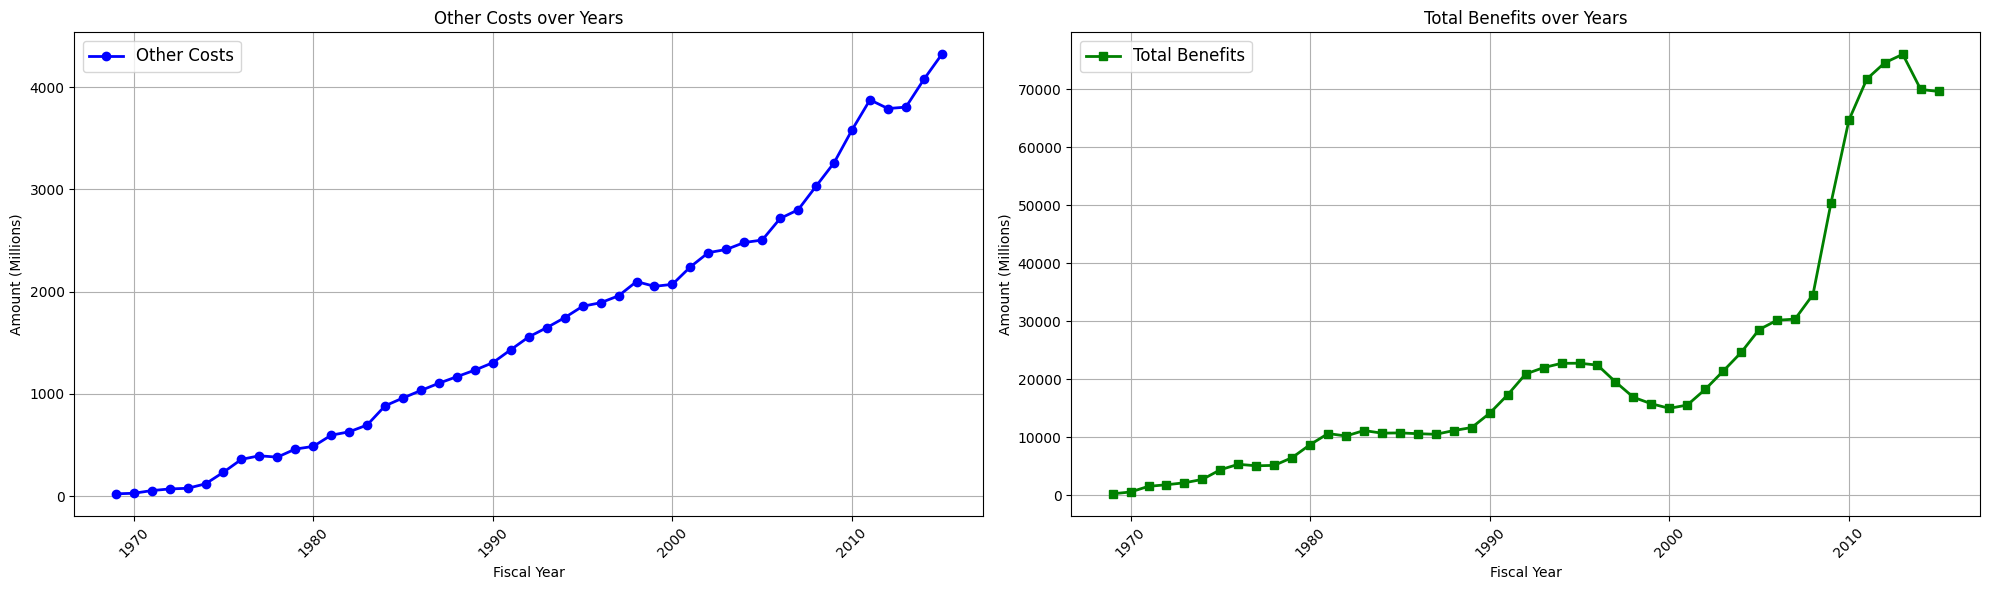

In [49]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Subplot 1: Line Chart showing Other Costs over Years
axs[0].plot(merged_df['Fiscal Year'], merged_df['All Other Costs (Millions)'], marker='o', color='blue', linewidth=2, label='Other Costs')
axs[0].set_title('Other Costs over Years')
axs[0].set_xlabel('Fiscal Year')
axs[0].set_ylabel('Amount (Millions)')
axs[0].xaxis.set_tick_params(rotation=45)
axs[0].grid(True)
axs[0].legend(loc='upper left', fontsize='large')

# Subplot 2: Line Chart showing Total Benefits over Years
axs[1].plot(merged_df['Fiscal Year'], merged_df['Total Benefits (Millions)'], marker='s', color='green', linewidth=2, label='Total Benefits')
axs[1].set_title('Total Benefits over Years')
axs[1].set_xlabel('Fiscal Year')
axs[1].set_ylabel('Amount (Millions)')
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].grid(True)
axs[1].legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()



Our second question above was: How is the ratio of Americans on SNAP changing over time?

To answer this question we can create a barplot showing the ratio in all the years collected in our dataset. The below plot illustrates an overall upward trend but not an extreme rate. Also, it shows the largest upticks happening after known economic turndowns, as expected.

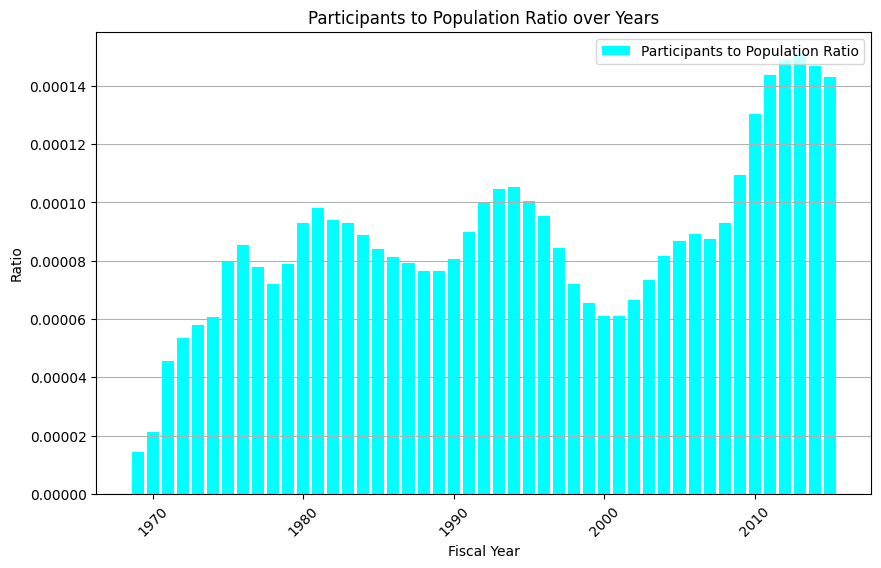

In [53]:
# Plot 2: Bar Plot showing Population Ratio over Years
plt.figure(figsize=(10, 6))
plt.bar(merged_df['Fiscal Year'], merged_df['Participants to Population Ratio'], color='cyan', label='Participants to Population Ratio')
plt.title('Participants to Population Ratio over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right', fontsize='medium')
plt.show()

Our third question was: Is there a relationship between the amount of participants in the program and the total amount each participant receives?

We create a scatterplot to illustrate this relationship. The below plot shows us an interesting shape. It has an overall upwards trend but a weird back and forth between 20,000 and 30,000 participants.

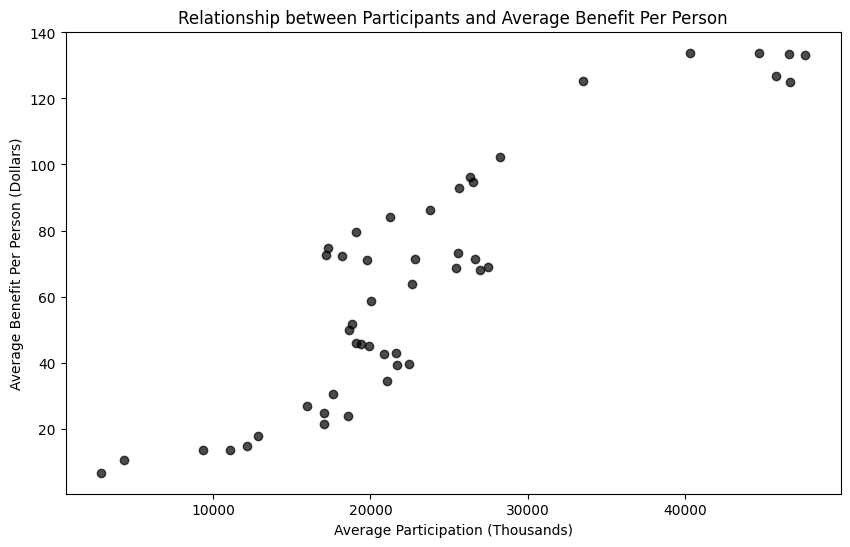

In [54]:
# Plot 3: Scatter plot to analyze relationship between participants and average benefit per person
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Average Participation (Thousands)'], merged_df['Average Benefit Per Person (Dollars)'], color='black', alpha=0.7)
plt.title('Relationship between Participants and Average Benefit Per Person')
plt.xlabel('Average Participation (Thousands)')
plt.ylabel('Average Benefit Per Person (Dollars)')
plt.grid(False)
plt.show()

We will now try recreating these plots using the Seaborn library and the highlight some differences.

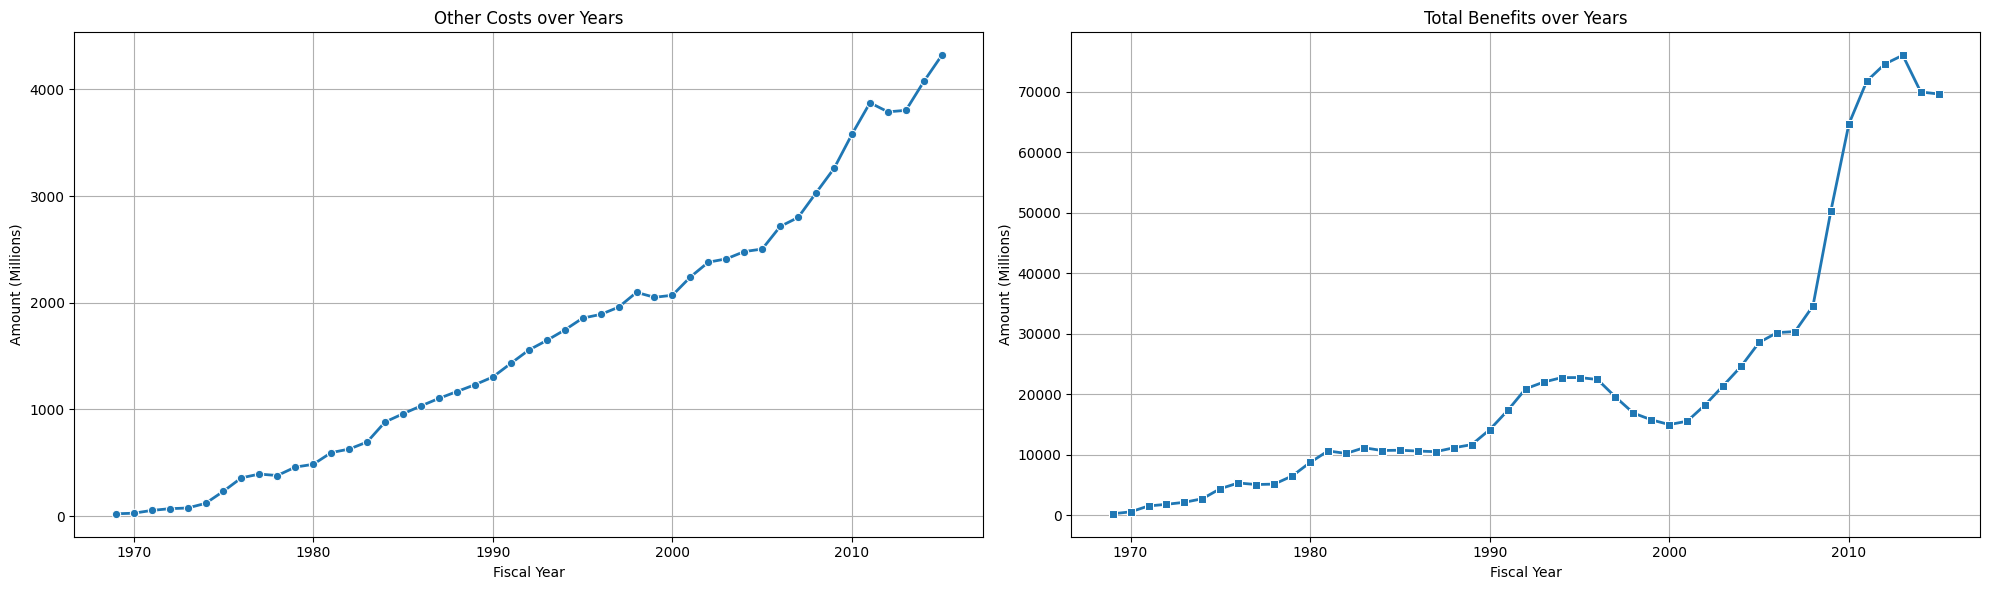

In [57]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Subplot 1: Line Chart showing Other Costs over Years
sns.lineplot(x='Fiscal Year', y='All Other Costs (Millions)', data=merged_df, ax=axs[0], marker='o', linewidth=2)
axs[0].set_title('Other Costs over Years')
axs[0].set_ylabel('Amount (Millions)')
axs[0].grid(True)

# Subplot 2: Line Chart showing Total Benefits over Years
sns.lineplot(x='Fiscal Year', y='Total Benefits (Millions)', data=merged_df, ax=axs[1], marker='s', linewidth=2)
axs[1].set_title('Total Benefits over Years')
axs[1].set_ylabel('Amount (Millions)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

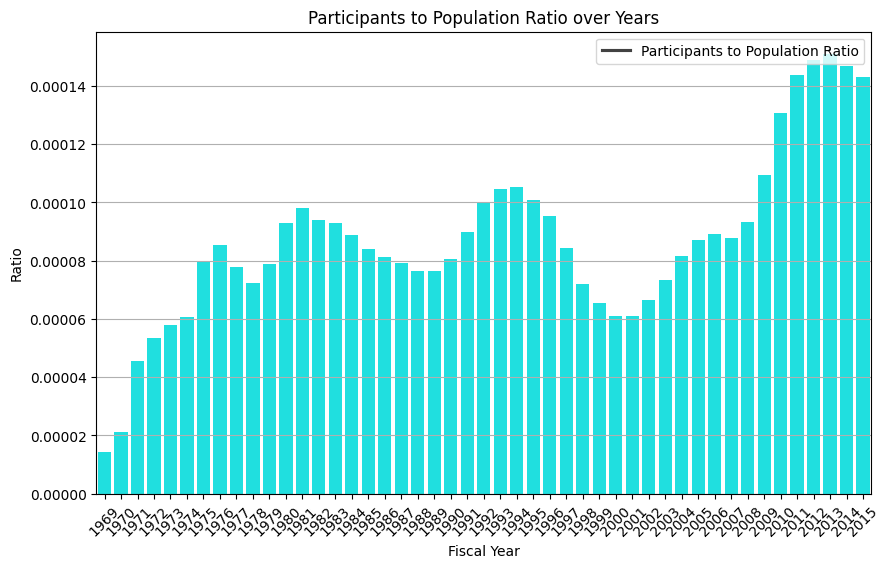

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year', y='Participants to Population Ratio', data=merged_df, color='cyan')
plt.title('Participants to Population Ratio over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(['Participants to Population Ratio'], loc='upper right', fontsize='medium')
plt.show()


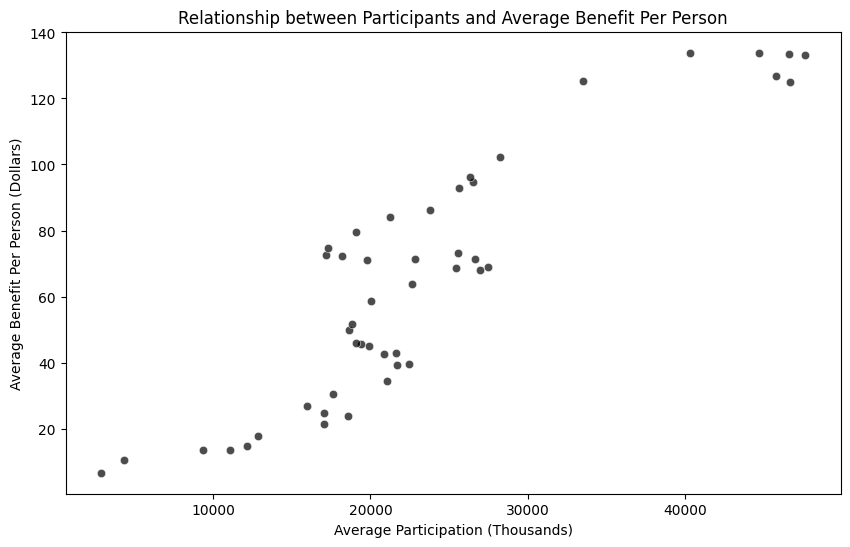

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Participation (Thousands)', y='Average Benefit Per Person (Dollars)', data=merged_df, color='black', alpha=0.7)
plt.title('Relationship between Participants and Average Benefit Per Person')
plt.xlabel('Average Participation (Thousands)')
plt.ylabel('Average Benefit Per Person (Dollars)')
plt.grid(False)
plt.show()

While the above plots are extremely similar to the original pyplot plots, the Seaborn plots look a little more visually appealing, particularly the line plots. The Seaborn plot also labeled the year for every bar in the bar plot, which can be an improvement over the pyplot plot. In order to reach similar outputs to generate the same subplots above, the Pyplot code required 17 lines of code versus 11 for the Seaborn code. This is a minor difference, but it shows that Seaborn can be more concise and easier to use for generating similar plots. However, Pyplot's basic interface can be beneficial for extreme customizations. Since Seaborn is built on top of Matplotlib, it was possible to use both libraries together. In the Seaborn section, I used Seaborn to generate the basic plot, and further customized it using Pyplot. 

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

We used our data to answer these three questions: 

- What is the relationship between the costs of running the program relative to the amount being distributed and how does that relationship change over time?

There does not seem to be a direct linear relationship between these variables, but they are both steadily increasing over time.

- How is the ratio of Americans on SNAP changing over time?

The ratio of Americans on SNAP seems to be slightly increasing over time, with a pretty significant increase in the 2010s. Additionally, the years following an economic downturn are the years with the largest increses in participants.

- Is there a relationship between the amount of participants in the program and the total amount each participant receives?

There seems to be an overall positive relationship between these variables. But there is also an interesting pattern that requires more investigation.